# Lab 5: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doing supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 5.A: kNN Tutorial with Questions (30% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [277]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [278]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

In [279]:
print("Iris.data is of type", type(iris.data))
print("The dataset has this dimension ", iris.data.shape)
print("Iris.target is of type", type(iris.target))
print(iris.target.shape)

Iris.data is of type <class 'numpy.ndarray'>
The dataset has this dimension  (150, 4)
Iris.target is of type <class 'numpy.ndarray'>
(150,)


Iris.target should have a dimension of 1 because it is the label vector.

<Figure size 432x288 with 0 Axes>

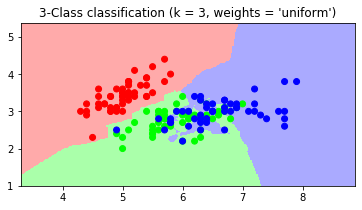

In [280]:
k = 3   # how many nearest neighbors are consulted

# get all the rows with the first 2 columns
X = iris.data[:, [0,1]]  # we only take the first two features. We could

# 
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.

# This is the predictor = create(algorithm_type, D) step as mentioned
# in the text above
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# This is the y_new = predictor(x_new) step as mentioned above in the text
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.


**Answer 1:** After changing k to 3, I see that the green region is more flatten out. It takes up more space and it expands leftward to the red region and rightward to the blue region. Thus, the green region is covering more of the green points versus when k was set to 25. 

The boundaries are more refined to cover the points with the same color. 

I think we observed these differences is because of the fact that the number of neighbors is smaller so the algorithm only cares about the most nearest one. When we set k to 25, the algorithm might pick further neighbors with different properties and if those further neighbors dominate as a majority when it comes to predicting the label, this might have a more siginificance and therefore, the figure is not as refined. 

**Answer 2:** As k being set to a higher value, the figure is less refined. I observe that the green region is swallowing up more blue dots as well.

**Answer 3:** 

After consulting some online documentation, this means that the algorithm gives more weights to closer neighbors than farther neighbors when weights=distance. For weights=uniform, the algorithm gives the same weight to all k-closest neighbors regardless of its distance. 

By setting clf to distance, I observe that the figure is more refined. The blue dots that were covered by the green region are now being covered by the blue region. This might means that the algorithm's accuracy has gone up. 

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [281]:
from sklearn.model_selection import train_test_split

# the test set will be 33% of the original dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 4**. What is the size of the resulting objects?

**Answer 4:** The test set should be 33% of the original iris dataset.

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [282]:
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [283]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)

# compare predicted and true labels

# zip matches an item from one list with another.
# both item must have the same index
print(list(zip(yhat,y_test[i])))

[[6.5 3.2]
 [6.3 3.3]
 [6.9 3.1]
 [4.4 3.2]]
[(1, 2), (1, 2), (1, 2), (0, 0)]


**Question 5**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

**Answer 5:** The kNN achieves a 100% accuracy when predicting the labels of the first 4 test examples.

**Question 6**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

**Question 7**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 6*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 6 and 7):

In [284]:
# Answer 6
# predictions and true_labels must be arrays
# they can either be NP arrays or of list type
def accuracy_rate(predictions, true_labels):
    right_count = 0
    for i in range(len(predictions)):
        predict_label = predictions[i]
        true_label = true_labels[i]
        
        if predict_label == true_label:
            right_count += 1
    score = (right_count / len(predictions)) * 100.00
    return score

# Answer 7

# run predictor on all test examples
yhat = predictor.predict(X_test)

# find accuracy after running the predictor on all test examples
print(accuracy_rate(yhat,y_test))

66.0


In [285]:
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.66


**Question 8**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

**Question 9**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

In [286]:
# Answer 8
k_choices = [1,3,5,5,15,25,50]

for k in k_choices:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor.fit(X_train, y_train);
    accuracy = predictor.score(X_test,y_test)
    print("With k as: " + str(k) + " we achieve accuracy rate of: " + str(accuracy))

With k as: 1 we achieve accuracy rate of: 0.66
With k as: 3 we achieve accuracy rate of: 0.72
With k as: 5 we achieve accuracy rate of: 0.76
With k as: 5 we achieve accuracy rate of: 0.76
With k as: 15 we achieve accuracy rate of: 0.74
With k as: 25 we achieve accuracy rate of: 0.66
With k as: 50 we achieve accuracy rate of: 0.66


**Answer 8 (continued):**
The choice of 5 for k resulted in the highest accuracy, which is 76%. 

In kNN algorithm, for k = 25 examples and the size of the training set is 66 examples, I think there is a possibility of overfitting here. Despite having the highest accuracy score on the testing set, the model was built on a relatively small dataset with somewhat a high choice for k.

It is not surprising that if we set k too low or too high, the accuracy rates are low. If k is too low, then the model might not be able to observe some more farther neighbor datapoints that might have similar properties that might help to predict an example better.

If k is too high, then the model might takes into consideration of even farther datapoints that have different properties that can skew the predictive label away from the true label. 

**Answer 9:**
The 3 options that I saw from the documentation are uniform, distance and [callable].

For the uniform option, all of the examples are weighted the same.

For the distance option, the closer neighbors are given greater weights than the further ones. 

For the [callable] option, the user can write a function that takes in an array of distances and return an array of the same shape that defines the weights.

In [287]:
# this customized function gives uniform weights to
# all the examples
def customized_weights(weights):
    weight_new = []
    for i in range(len(weights)):
        weight_new.append(1)
    return weight_new

# using customized_ weights function 
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights=customized_weights)
predictor.fit(X_train, y_train);
print(predictor.score(X_test, y_test))

predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights='uniform')
predictor.fit(X_train, y_train);
print(predictor.score(X_test, y_test))

0.66
0.66


## Lab 5.B Training kNN classifier on Iris and Wine Quality data (70% of grade)
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

**Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

#### Wine Quality Questions
Wine Quality data set can be accessed from the UCI Machine Learning Repository website at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. In this lab you will be working with the white wine data set https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

**Question Wine 1** Perform EDA on the data set to get an insight into the data. Prepare 1 page pdf document summarizing the interesting aspects of the data. Upload the pdf file named WineEDA.pdf to Canvas.

**Question Wine 2**. Since kNN is a relatively slow algorithms, create your data set by picking 2,000 examples randomly. Pay attention that the 12th column in the data set (quality) should be your label (call it y) and the first 11 columns should be your attribues (call it X). Because y are numbers from 0-10, let us create a binary label by converting ratings 7 and below to 0 and ratings above 7 as 1. Split your data into 66% training and 33% test data sets. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy.

**Question Wine 3**. Train a kNN classifier using different values of $k$ and any other different choice of hyperparameters, hoping to improve accuracy. Report the results.

**Question Wine 4** Pay attention that range of vallues for different attributes is quite different. *Question*: what is the impact of attributes with different ranges to kNN algorithm? In order to give each attribute equal change, scale each attribute to the same range to make sure the minimum is 0 and maximum is 1. *Question*: What is the formula to achieve this? Implement this formula and create a scaled data set (remember, any scaling you apply on the training data should also be used on the test data). Apply kNN and measure the accuracy. Did your accuracy improve?

**Question Wine 5** Instead of treating the last column (quality) as a class label, we can treat is as numeric output. In the original format, the numbers range from 0 to 10. If we want to predict that number, the problem becomes regression. As we covered in class, kNN can also be used for regression. It is also implemented by sklearn. Use sklearn to test the accuracy of knn regression. Remember that the formula for regression accuracy is average squared error, also called the Mean Squared Error (MSE). 

**Deliverables** Submit the 1-page pdf file for EDA. Also, submit this notebook (enhanced with needed code) with all answers (added as tect comments) and all executed code for all the questions.

**Answer Iris 1:**

In [288]:
# training the model on the other pair of attributes
X = iris.data[:, [2,3]] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.96


From our observation, with k = 3 and 3rd with 4th attributes for training, I can see that the accuracy rate increased drastically. 

The pair of attributes that consist of 3rd and 4th attributes result in the highest accuracy rate. 

**Answer Iris 2:**

In [289]:
# training the model on all 4 of the attributes
X = iris.data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.98


In [290]:
# testing the different combinations of 
# k, weights and metrics
k_choices = [1,3,5,5,15,25,50]
weights = ['uniform', 'distance']
metric_choices = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
dict_kNN = {}

for k in k_choices:
    for w in weights:
        for m in metric_choices:
            predictor = neighbors.KNeighborsClassifier(n_neighbors = k, metric=m, weights=w, p=2)
            predictor.fit(X_train, y_train);
            accuracy = predictor.score(X_test,y_test)
            dict_kNN[(k, w, m)] = accuracy
            print(k, w, m, accuracy)

1 uniform euclidean 0.96
1 uniform manhattan 0.96
1 uniform chebyshev 1.0
1 uniform minkowski 0.96
1 distance euclidean 0.96
1 distance manhattan 0.96
1 distance chebyshev 1.0
1 distance minkowski 0.96
3 uniform euclidean 0.98
3 uniform manhattan 0.98
3 uniform chebyshev 0.98
3 uniform minkowski 0.98
3 distance euclidean 0.98
3 distance manhattan 0.98
3 distance chebyshev 0.98
3 distance minkowski 0.98
5 uniform euclidean 1.0
5 uniform manhattan 0.98
5 uniform chebyshev 1.0
5 uniform minkowski 1.0
5 distance euclidean 1.0
5 distance manhattan 0.98
5 distance chebyshev 1.0
5 distance minkowski 1.0
5 uniform euclidean 1.0
5 uniform manhattan 0.98
5 uniform chebyshev 1.0
5 uniform minkowski 1.0
5 distance euclidean 1.0
5 distance manhattan 0.98
5 distance chebyshev 1.0
5 distance minkowski 1.0
15 uniform euclidean 0.98
15 uniform manhattan 0.98
15 uniform chebyshev 0.94
15 uniform minkowski 0.98
15 distance euclidean 0.98
15 distance manhattan 0.98
15 distance chebyshev 0.96
15 distance m

In [291]:
# sorting the keys in dictionary to see which choices
# for kNN params result in the highest accuracy rate

# sorting the dictionary by values in descending order
sorted_dict = [k for k, v in sorted(dict_kNN.items(), key=lambda item: item[1], reverse=True)]

# print out the paramaters lists that gave the top 10 accuracy rate
print(sorted_dict[:10])

[(1, 'uniform', 'chebyshev'), (1, 'distance', 'chebyshev'), (5, 'uniform', 'euclidean'), (5, 'uniform', 'chebyshev'), (5, 'uniform', 'minkowski'), (5, 'distance', 'euclidean'), (5, 'distance', 'chebyshev'), (5, 'distance', 'minkowski'), (3, 'uniform', 'euclidean'), (3, 'uniform', 'manhattan')]


As observed above, with k = 1, the model resulted in very high accuracy rate. For parameters that result in top 10 accuracy rate, 7 out of 10 parameter list contains k = 1. In regards to the parameters of weights and distance, there seems to be no best choice. 

**Answer Wine 1:**

In [292]:
import pandas as pd
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

In [293]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [294]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [295]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [296]:
# split the data by quality
# and perform aggregation analysis
grouped_quality = wine.groupby('quality')

for attribute in wine.columns:
    avg = grouped_quality[attribute].agg('mean')
    print("The average " + attribute + "\n")
    print(str(avg))

The average fixed acidity

quality
3    7.600000
4    7.129448
5    6.933974
6    6.837671
7    6.734716
8    6.657143
9    7.420000
Name: fixed acidity, dtype: float64
The average volatile acidity

quality
3    0.333250
4    0.381227
5    0.302011
6    0.260564
7    0.262767
8    0.277400
9    0.298000
Name: volatile acidity, dtype: float64
The average citric acid

quality
3    0.336000
4    0.304233
5    0.337653
6    0.338025
7    0.325625
8    0.326514
9    0.386000
Name: citric acid, dtype: float64
The average residual sugar

quality
3    6.392500
4    4.628221
5    7.334969
6    6.441606
7    5.186477
8    5.671429
9    4.120000
Name: residual sugar, dtype: float64
The average chlorides

quality
3    0.054300
4    0.050098
5    0.051546
6    0.045217
7    0.038191
8    0.038314
9    0.027400
Name: chlorides, dtype: float64
The average free sulfur dioxide

quality
3    53.325000
4    23.358896
5    36.432052
6    35.650591
7    34.125568
8    36.720000
9    33.400000
Name: free su

In [297]:
# find the correlation coefficient between each attribute
# and the quality of the wine
wine.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

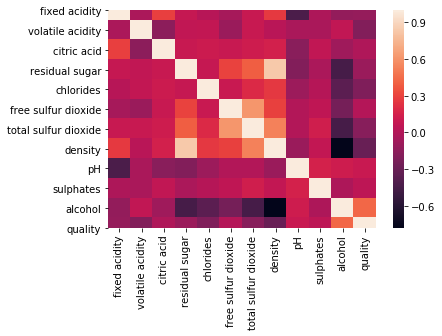

In [298]:
import seaborn as sns
Var_Corr = wine.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

As we observe from finding the correlation coefficient of each attribute to the quality of the wine, there seems to be no strong attribute that has a strong correlation of the quality of the wine because all of them have their correlation coefficient against the wine quality to be under 50%.

In our observation of the heatmap, we do observe some high correlation among the attributes themselves.

Density and Residual Sugar has a strong positive correlation coefficient.

The following pairs of attributes have a strong negative correlation coefficient:

pH and fixed acidity
alcohol vs residual sugar, chlorides, total sulfur dioxide, density.

By observing high correlation coefficients among the attributes themselves, maybe we can get rid or perform dimensionality reduction on the dataset.

### What makes wine to have high quality?

Below, we will perform analysis on wine with quality of 8 and up.

In [299]:
wine_eight_and_up = wine[wine["quality"] >= 8]
wine_eight_and_up.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,6.678333,0.277972,0.328167,5.628333,0.038011,36.627778,125.883333,0.992214,3.221167,0.485667,11.651111,8.027778
std,0.830647,0.106912,0.085688,4.248523,0.013150,16.110662,32.719653,0.002791,0.151375,0.145702,1.274349,0.164794
min,3.900000,0.120000,0.040000,0.800000,0.014000,6.000000,59.000000,0.987130,2.940000,0.250000,8.500000,8.000000
25%,6.200000,0.200000,0.280000,2.075000,0.030000,28.000000,102.750000,0.990260,3.127500,0.380000,11.000000,8.000000
50%,6.800000,0.260000,0.320000,4.300000,0.035500,34.500000,122.000000,0.991620,3.230000,0.460000,12.000000,8.000000
75%,7.300000,0.330000,0.360000,8.150000,0.044000,44.250000,148.500000,0.993478,3.330000,0.582500,12.600000,8.000000
max,9.100000,0.660000,0.740000,14.800000,0.121000,105.000000,212.500000,1.000600,3.590000,0.950000,14.000000,9.000000


### What makes wine to have low quality?

Below, we will perform analysis on wine with quality of 4 and down

In [300]:
wine_four_and_down = wine[wine["quality"] <= 4]
wine_four_and_down.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,7.180874,0.375984,0.307705,4.821038,0.050557,26.633880,130.232240,0.994343,3.183388,0.475956,10.173497,3.890710
std,1.171885,0.170525,0.157131,4.322845,0.028700,31.001858,62.373163,0.002504,0.168668,0.117847,1.027570,0.312858
min,4.200000,0.110000,0.000000,0.700000,0.013000,3.000000,10.000000,0.989200,2.830000,0.250000,8.000000,3.000000
25%,6.400000,0.260000,0.205000,1.350000,0.037500,9.000000,85.500000,0.992580,3.060000,0.380000,9.400000,4.000000
50%,6.900000,0.320000,0.300000,2.700000,0.046000,18.000000,119.000000,0.994100,3.160000,0.470000,10.100000,4.000000
75%,7.650000,0.460000,0.400000,7.500000,0.054000,33.500000,177.000000,0.996010,3.285000,0.540000,10.800000,4.000000
max,11.800000,1.100000,0.880000,17.550000,0.290000,289.000000,440.000000,1.000400,3.720000,0.870000,13.500000,4.000000


In [301]:
for attribute in wine.columns:
    diff = wine_eight_and_up.describe().loc["mean", attribute] - wine_four_and_down.describe().loc["mean",attribute]
    print("The mean difference in " + str(attribute) + " is: " + str(diff))

The mean difference in fixed acidity is: -0.502540983606556
The mean difference in volatile acidity is: -0.09801138433515516
The mean difference in citric acid is: 0.020461748633880006
The mean difference in residual sugar is: 0.8072950819672116
The mean difference in chlorides is: -0.012546265938069186
The mean difference in free sulfur dioxide is: 9.993897996357013
The mean difference in total sulfur dioxide is: -4.348907103825141
The mean difference in density is: -0.002128671220399947
The mean difference in pH is: 0.0377786885245901
The mean difference in sulphates is: 0.009710382513660909
The mean difference in alcohol is: 1.4776138433515449
The mean difference in quality is: 4.1370673952641175


**Answer Wine 2**

In [302]:
# Create a dataset by picking 2000 examples randomly
wine_2000 = wine.sample(n = 2000)

# turning y into a binary classifer
# =< 7  rating is 0, else is 1
wine_2000.loc[wine_2000['quality'] <= 7, "quality"] = 0
wine_2000.loc[wine_2000['quality'] > 7, "quality"] = 1

In [303]:
X = wine_2000.iloc[:, [i for i in range(11)]]
y = wine_2000.iloc[:, [11]]

In [304]:
# the test set will be 33% of the original dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2836,6.5,0.22,0.45,8.00,0.053,52.0,196.0,0.99590,3.23,0.48,9.1
4089,6.8,0.27,0.24,4.60,0.098,36.0,127.0,0.99412,3.15,0.49,9.6
675,6.1,0.28,0.25,6.90,0.056,44.0,201.0,0.99550,3.19,0.40,9.1
1575,6.8,0.17,0.74,2.40,0.053,61.0,182.0,0.99530,3.63,0.76,10.5
2570,6.6,0.24,0.28,1.80,0.028,39.0,132.0,0.99182,3.34,0.46,11.4
...,...,...,...,...,...,...,...,...,...,...,...
4031,6.4,0.29,0.57,1.00,0.060,15.0,120.0,0.99240,3.06,0.41,9.5
1655,7.8,0.28,0.49,1.30,0.046,27.0,142.0,0.99360,3.09,0.59,10.2
2247,6.1,0.15,0.29,6.20,0.046,39.0,151.0,0.99471,3.60,0.44,10.6
1342,8.4,0.58,0.27,12.15,0.033,37.0,116.0,0.99590,2.99,0.39,10.8


In [305]:
import time
start_time = time.time()

# training the classifer with k = 3 and the default options
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);

print(predictor.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.9696969696969697
--- 0.15952205657958984 seconds ---


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


With k = 3, the accuracy rate is 96%, which is very impressive.

The total computational time for a dataset of 2000 examples is .15 seconds.

**Answer Wine 3:**

In [306]:
k_choices = [1,3,5,5,15,25,50]
weights = ['uniform', 'distance']
metric_choices = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
dict_kNN = {}

for k in k_choices:
    for w in weights:
        for m in metric_choices:
            predictor = neighbors.KNeighborsClassifier(n_neighbors = k, metric=m, weights=w, p=2)
            predictor.fit(X_train, y_train);
            accuracy = predictor.score(X_test,y_test)
            dict_kNN[(k, w, m)] = accuracy
            print(k, w, m, accuracy)
# sorting the dictionary by values in descending order
sorted_dict = [k for k, v in sorted(dict_kNN.items(), key=lambda item: item[1], reverse=True)]

# print out the paramaters lists that gave the top 10 accuracy rate
print(sorted_dict[:10])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


1 uniform euclidean 0.9590909090909091
1 uniform manhattan 0.9575757575757575
1 uniform chebyshev 0.9575757575757575


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

1 uniform minkowski 0.9590909090909091
1 distance euclidean 0.9590909090909091
1 distance manhattan 0.9575757575757575
1 distance chebyshev 0.9575757575757575
1 distance minkowski 0.9590909090909091
3 uniform euclidean 0.9696969696969697


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3 uniform manhattan 0.9712121212121212
3 uniform chebyshev 0.9666666666666667
3 uniform minkowski 0.9696969696969697
3 distance euclidean 0.9712121212121212
3 distance manhattan 0.9742424242424242
3 distance chebyshev 0.9696969696969697


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

3 distance minkowski 0.9712121212121212
5 uniform euclidean 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


5 uniform manhattan 0.9696969696969697
5 uniform chebyshev 0.9712121212121212
5 uniform minkowski 0.9712121212121212
5 distance euclidean 0.9742424242424242


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

5 distance manhattan 0.9742424242424242
5 distance chebyshev 0.9772727272727273
5 distance minkowski 0.9742424242424242
5 uniform euclidean 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

5 uniform manhattan 0.9696969696969697
5 uniform chebyshev 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


5 uniform minkowski 0.9712121212121212
5 distance euclidean 0.9742424242424242
5 distance manhattan 0.9742424242424242
5 distance chebyshev 0.9772727272727273
5 distance minkowski 0.9742424242424242


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

15 uniform euclidean 0.9712121212121212
15 uniform manhattan 0.9712121212121212
15 uniform chebyshev 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


15 uniform minkowski 0.9712121212121212
15 distance euclidean 0.9787878787878788
15 distance manhattan 0.9787878787878788
15 distance chebyshev 0.9787878787878788
15 distance minkowski 0.9787878787878788


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

25 uniform euclidean 0.9712121212121212
25 uniform manhattan 0.9712121212121212
25 uniform chebyshev 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


25 uniform minkowski 0.9712121212121212
25 distance euclidean 0.9787878787878788
25 distance manhattan 0.9787878787878788
25 distance chebyshev 0.9787878787878788
25 distance minkowski 0.9787878787878788
50 uniform euclidean 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

50 uniform manhattan 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


50 uniform chebyshev 0.9712121212121212


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


50 uniform minkowski 0.9712121212121212
50 distance euclidean 0.9787878787878788
50 distance manhattan 0.9787878787878788


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


50 distance chebyshev 0.9787878787878788
50 distance minkowski 0.9787878787878788
[(15, 'distance', 'euclidean'), (15, 'distance', 'manhattan'), (15, 'distance', 'chebyshev'), (15, 'distance', 'minkowski'), (25, 'distance', 'euclidean'), (25, 'distance', 'manhattan'), (25, 'distance', 'chebyshev'), (25, 'distance', 'minkowski'), (50, 'distance', 'euclidean'), (50, 'distance', 'manhattan')]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


The following parameter list yields the highest accuracy rate:

(5, 'distance', 'chebyshev'), 

(5, 'distance', 'euclidean'), 

(5, 'distance', 'minkowski'), 

(15, 'distance', 'euclidean'), 

(15, 'distance', 'manhattan'), 

(15, 'distance', 'chebyshev'), 

(15, 'distance', 'minkowski'), 

(25, 'distance', 'euclidean'), 

(25, 'distance', 'manhattan'), 

(25, 'distance', 'chebyshev')

In [307]:
for k in sorted_dict[:10]:
    print("Params ", k, "has accuracy rate: ", dict_kNN[k])

Params  (15, 'distance', 'euclidean') has accuracy rate:  0.9787878787878788
Params  (15, 'distance', 'manhattan') has accuracy rate:  0.9787878787878788
Params  (15, 'distance', 'chebyshev') has accuracy rate:  0.9787878787878788
Params  (15, 'distance', 'minkowski') has accuracy rate:  0.9787878787878788
Params  (25, 'distance', 'euclidean') has accuracy rate:  0.9787878787878788
Params  (25, 'distance', 'manhattan') has accuracy rate:  0.9787878787878788
Params  (25, 'distance', 'chebyshev') has accuracy rate:  0.9787878787878788
Params  (25, 'distance', 'minkowski') has accuracy rate:  0.9787878787878788
Params  (50, 'distance', 'euclidean') has accuracy rate:  0.9787878787878788
Params  (50, 'distance', 'manhattan') has accuracy rate:  0.9787878787878788


**Answer Wine 4:**
The formula for normalizing the data in which the minum is 0 and the maximum is 1 is:

normalized_data = (x - min) / (max - min)

In [308]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
X_train = normalize(X_train)
X_train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2836,0.214286,0.164706,0.45,0.290766,0.141304,0.168421,0.399015,0.546040,0.448980,0.302326,0.183333
4089,0.244898,0.223529,0.24,0.157171,0.304348,0.112281,0.229064,0.431423,0.367347,0.313953,0.266667
675,0.173469,0.235294,0.25,0.247544,0.152174,0.140351,0.411330,0.520283,0.408163,0.209302,0.183333
1575,0.244898,0.105882,0.74,0.070727,0.141304,0.200000,0.364532,0.507405,0.857143,0.627907,0.416667
2570,0.224490,0.188235,0.28,0.047151,0.050725,0.122807,0.241379,0.283323,0.561224,0.279070,0.566667
2394,0.193878,0.723529,0.55,0.483301,0.152174,0.189474,0.536946,0.685126,0.510204,0.313953,0.116667
642,0.193878,0.152941,0.33,0.522593,0.115942,0.224561,0.357143,0.623310,0.581633,0.325581,0.400000
4210,0.163265,0.105882,0.21,0.212181,0.130435,0.077193,0.246305,0.417257,0.295918,0.372093,0.300000
3628,0.204082,0.352941,0.20,0.184676,0.373188,0.185965,0.362069,0.461687,0.459184,0.244186,0.250000
4583,0.204082,0.176471,0.37,0.286837,0.130435,0.196491,0.285714,0.480361,0.071429,0.313953,0.216667


In [309]:
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);

print(predictor.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9712121212121212


Comparing the accuracy result of non-normalized vs. normalized datasets, I have only observe an increase of almost .03% in accuracy rate for min-max normalized dataset.

Score of non-normalized: 0.9575757575757575

Score of normalized: 0.9606060606060606

**Answer Wine 5:**

In [310]:
from sklearn.metrics import mean_squared_error
from math import sqrt

wine_2000_no_bin_classifer = wine.sample(n = 2000)
X = wine_2000.iloc[:, [i for i in range(11)]]
y = wine_2000.iloc[:, [11]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

k_choices = [1,3,5,5,15,25,50]

for k in k_choices: 
    predictor = neighbors.KNeighborsRegressor(n_neighbors = k)
    predictor.fit(X_train, y_train);
    pred = predictor.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    print('RMSE value for k = ' , k , 'is:', error)

RMSE value for k =  1 is: 0.2367712103711219
RMSE value for k =  3 is: 0.20719385350268701
RMSE value for k =  5 is: 0.19617555526835775
RMSE value for k =  5 is: 0.19617555526835775
RMSE value for k =  15 is: 0.18408020503444114
RMSE value for k =  25 is: 0.1832170430076985
RMSE value for k =  50 is: 0.1830913002914782


From observing the k values for KNN Regressor, we see that the RMSE decreases as we increase k.